In [2]:
import cv2 as cv 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import math
import numpy as np

### If you want to receive the photos one by one

In [6]:
imagefiles = glob.glob("Dataset\pelak\*.png")
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    data.append(img)

num_images = len(data)
num_images

1400

### You can also use the following code to get data

In [8]:
from numpy import load
# load dict of arrays
dict_data = load('Dataset/npz/plate/plate.npz')
# extract the first array
data = dict_data['arr_0']

### Find the label of each piece

1
1
Q
3
8
5
9
2


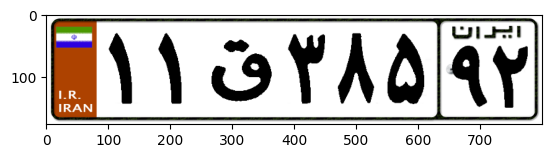

In [41]:
print(imagefiles[2][16:17])
print(imagefiles[2][17:18])
print(imagefiles[2][19:-11])
print(imagefiles[2][-10:-9])
print(imagefiles[2][-9:-8])
print(imagefiles[2][-8:-7])
print(imagefiles[2][-6:-5])
print(imagefiles[2][-5:-4])
plt.imshow(data[2])

### Cutting the plate into pieces and saving it

In [42]:
chopfactors = [(60,125), (125,190), (180,280), (280,350), (350,410), (410,470), (470,535), (535,600)]
first = [16,17,19,-10,-9,-8,-6,-5]
last = [17,18,-11,-9,-8,-7,-5,-4]
counter = 0
v = ''
for i in range(1400):
    img = data[i]
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    h, w = img_gray.shape
    plate_letters = []
    counter_little_loop = 0
    for factor in chopfactors:
        w1 = int((factor[0]/600)*w)
        w2 = int((factor[1]/600)*w)
        letterpatch = img_gray[:,w1:w2]
        letterpatch_resized  = cv.resize(letterpatch, (28,28), interpolation = cv.INTER_LINEAR)
        plate_letters.append(letterpatch_resized)
        counter += 1
        if counter < 10:
            v = '000'
        elif counter < 100 and counter >= 10:
            v = '00'
        elif counter < 1000 and counter >= 100:
            v = '0'
        else: 
            v = ''
        fi = first[counter_little_loop]
        la = last[counter_little_loop]
        cv.imwrite('Dataset\pieces\%s%s-%s.jpg' %(v,counter,imagefiles[i][fi:la]), letterpatch_resized)
        counter_little_loop += 1

### Save the dataset in npz format

In [5]:
from numpy import asarray
from numpy import savez_compressed
# save to npy file
savez_compressed('Dataset/npz/nu_le/nu_le.npz', plate_letters)

### Reading data

In [5]:
imagefiles = glob.glob("Dataset\pieces\*.jpg")
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    data.append(img)

num_images = len(data)
num_images

11200

### Work on the label

In [10]:
lst = []
for i in range(num_images):
    lst.append(imagefiles[i][20:-4])

In [13]:
from numpy import asarray
from numpy import savez_compressed
# save to npy file
savez_compressed('Dataset/npz/nu_le/nu_le_label.npz', lst)

### Numbering of all labels

In [14]:
lst_fi = []
for i in lst:
    if i == '0':
        lst_fi.append(0)
    elif i == '1':
        lst_fi.append(1)
    elif i == '2':
        lst_fi.append(2)
    elif i == '3':
        lst_fi.append(3)
    elif i == '4':
        lst_fi.append(4)
    elif i == '5':
        lst_fi.append(5)
    elif i == '6':
        lst_fi.append(6)
    elif i == '7':
        lst_fi.append(7)
    elif i == '8':
        lst_fi.append(8)
    elif i == '9':
        lst_fi.append(9)
    elif i == 'B':
        lst_fi.append(10)
    elif i == 'Q':  #ق
        lst_fi.append(11)
    elif i == 'H':  #ه
        lst_fi.append(12)
    elif i == 'SAD':  #ص
        lst_fi.append(13)
    elif i == 'TA':  #ط
        lst_fi.append(14)
    elif i == 'V':  #و
        lst_fi.append(15)
    elif i == 'M':  #م
        lst_fi.append(16)
    elif i == 'J':  #ج
        lst_fi.append(17)
    elif i == 'Y':  #ی
        lst_fi.append(18)
    elif i == 'EIN':  #ع
        lst_fi.append(19)
    elif i == 'N':  #ن
        lst_fi.append(20)
    elif i == 'D':  #د
        lst_fi.append(21)
    elif i == 'T':  #ت
        lst_fi.append(22)
    elif i == 'HE':  #ح
        lst_fi.append(23)
    elif i == 'L':  #ل
        lst_fi.append(24)
    elif i == 'SIN':  #س
        lst_fi.append(25)
    else:
        lst_fi.append(i)

In [17]:
from numpy import asarray
from numpy import savez_compressed
# save to npy file
savez_compressed('Dataset/npz/nu_le/nu_le_label_index.npz', lst_fi)